# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [23]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Trouve-moi un itinÃ©raire pour aller de meroux...,1,0,0,0
1,Où puis-je changer des devises étrangères ?,0,0,1,0
2,mymtbh unab zbakod nelrqgdgp sznlrls noe coi...,0,0,0,1
3,Tom se preguntaba qué tan profundo era el río.,0,1,1,0
4,Trouve-moi le chemin pour rejoindre la rÃ©side...,1,0,0,0
...,...,...,...,...,...
1414526,My journey starts at the city of Marcilly Sur ...,0,1,1,0
1414527,Comment puis-je me rendre de vannes Ã l'aérop...,1,0,0,0
1414528,"How long will you remain in Tokyo? ""Until Frid...",0,1,1,0
1414529,Je dÃ©sire aller Ã la gare de Versailles depu...,1,0,0,0


In [24]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


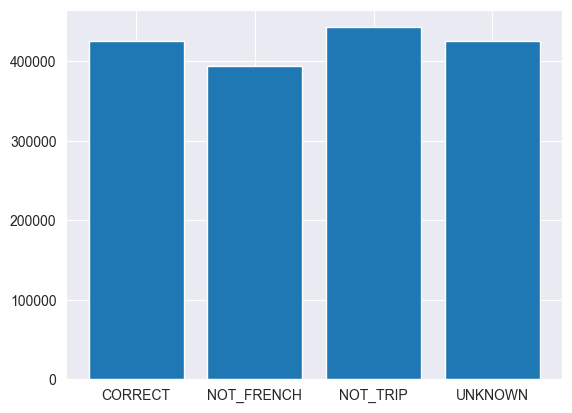

In [25]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [26]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(565812,) (70727,) (70727,)
(565812, 4) (70727, 4) (70727, 4)


In [27]:
X_train.values

array(['Finding a way to reach BEILLÉ from CHATEAUBRIANT is my goal.',
       "I'm looking for a way to depart from the airport of Neufchâteau.",
       'seIzC3,?7/HK;f1t})s)**^}uziyvyZ*l^{h:?nfsGn*zdlm{f(yLOUQ@O)Xaq=JAJK|~M1f[/#[Q3awPEQ&S,gABGn >J=Puq$Q',
       ...,
       "Indique-moi le trajet le plus simple depuis l'aéroport de le pont-de-beauvoisin vers manosque.",
       'Calculs pour me mener de issoire lycée deville Ã\xa0 hazebrouck, et me rapprocher de Jonass.',
       'Je cherche Ã\xa0 me dÃ©placer vers buswiller eglise depuis boussens. Comment procÃ©der ?'],
      dtype=object)

# Récupération des stop words français et anglais

In [28]:
from stop_words import get_stop_words

stop_words = get_stop_words('french')
stop_words[:10]

['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun']

# Exemple d'utilisation de CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(stop_words=stop_words)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<565812x1324029 sparse matrix of type '<class 'numpy.int64'>'
	with 5343180 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [30]:
v.get_feature_names_out()[100000:100050]

array(['_0qq', '_0r', '_0rg9vj', '_0ri', '_0rnf', '_0rng', '_0rnnuopci',
       '_0rqg', '_0rwui', '_0s', '_0s5c3', '_0s6r_zx', '_0srl', '_0stva',
       '_0sy2', '_0t', '_0tibdu', '_0tm', '_0tqx7s', '_0ts', '_0tva8q',
       '_0u', '_0u3rg', '_0ul', '_0ulmj', '_0um', '_0upegc5', '_0uy2itjp',
       '_0v', '_0v1lk', '_0vbha', '_0vcb', '_0vg', '_0vj', '_0vp', '_0vs',
       '_0vs0y', '_0vx', '_0w', '_0w48y', '_0wbpgjs', '_0wclf1ku72',
       '_0wjath', '_0ww', '_0x', '_0x9suoh5vxts', '_0xc', '_0xg',
       '_0xjhdtc2e', '_0y'], dtype=object)

In [31]:
# Number of identified features
v.get_feature_names_out().shape

(1324029,)

In [32]:
v = CountVectorizer(stop_words=stop_words)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x84244 sparse matrix of type '<class 'numpy.int64'>'
	with 3756618 stored elements in Compressed Sparse Row format>

In [33]:
# Number of identified features
v.get_feature_names_out().shape

(84244,)

In [34]:
v.get_feature_names_out()[30000:30050]

array(['frutto', 'fry', 'fryderyk', 'frying', 'frágil', 'fräulein',
       'frère', 'frères', 'frédy', 'frédéric', 'frédérica', 'frédérick',
       'frédérico', 'frédérique', 'fréjus', 'frémi', 'fréquence',
       'fréquentais', 'fréquentations', 'fréquentent', 'fréquenté',
       'frétillent', 'fría', 'frías', 'frío', 'fröhlich', 'fröhliche',
       'fröhlichen', 'fröhlicher', 'fröhlichsein', 'frömmigkeit',
       'früchte', 'früh', 'frühaufsteher', 'frühe', 'frühen', 'früher',
       'frühere', 'früheren', 'frühjahr', 'frühjahrsgemüse', 'frühling',
       'frühlings', 'frühlingsblumen', 'frühlingssonne', 'frühmorgens',
       'frühstück', 'frühstücke', 'frühstücken', 'frühstückstisch'],
      dtype=object)

In [35]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(stop_words=stop_words, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x1822 sparse matrix of type '<class 'numpy.int64'>'
	with 3449493 stored elements in Compressed Sparse Row format>

In [36]:
# Number of identified features
v.get_feature_names_out().shape

(1822,)

In [37]:
v.get_feature_names_out()[::50]

array(['11', 'allier', 'arnac', 'bagnères', 'bien', 'bus', 'cercy',
       'châteaudun', 'coutras', 'did', 'durtol', 'etaples', 'fossés',
       'gli', 'have', 'imminent', 'knew', 'libourne', 'lune', 'marne',
       'miramas', 'most', 'neufchateau', 'ogni', 'passer', 'point',
       'quelque', 'riom', 'same', 'she', 'stay', 'them', 'tournan',
       'valdahon', 'ville', 'were', 'yzan'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stop_words)),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['a', 'ai', 'aie', 'aient', 'aies',
                                             'ait', 'alors', 'as', 'au',
                                             'aucun', 'aura', 'aurai',
                                             'auraient', 'aurais', 'aurait',
                                             'auras', 'aurez', 'auriez',
                                             'aurions', 'aurons', 'auront',
                                             'aussi', 'autre', 'aux', 'avaient',
                                             'avais', 'avait', 'avant', 'avec',
                                             'avez', ...])),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [39]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.83      1.00      0.90     21360
  NOT_FRENCH       0.99      1.00      0.99     19478
    NOT_TRIP       0.95      0.83      0.89     21729
     UNKNOWN       1.00      0.99      1.00     21527

   micro avg       0.93      0.95      0.94     84094
   macro avg       0.94      0.96      0.95     84094
weighted avg       0.94      0.95      0.94     84094
 samples avg       0.93      0.95      0.94     84094


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

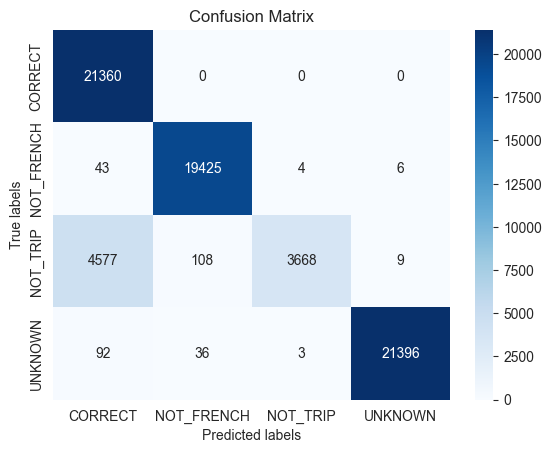

In [41]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

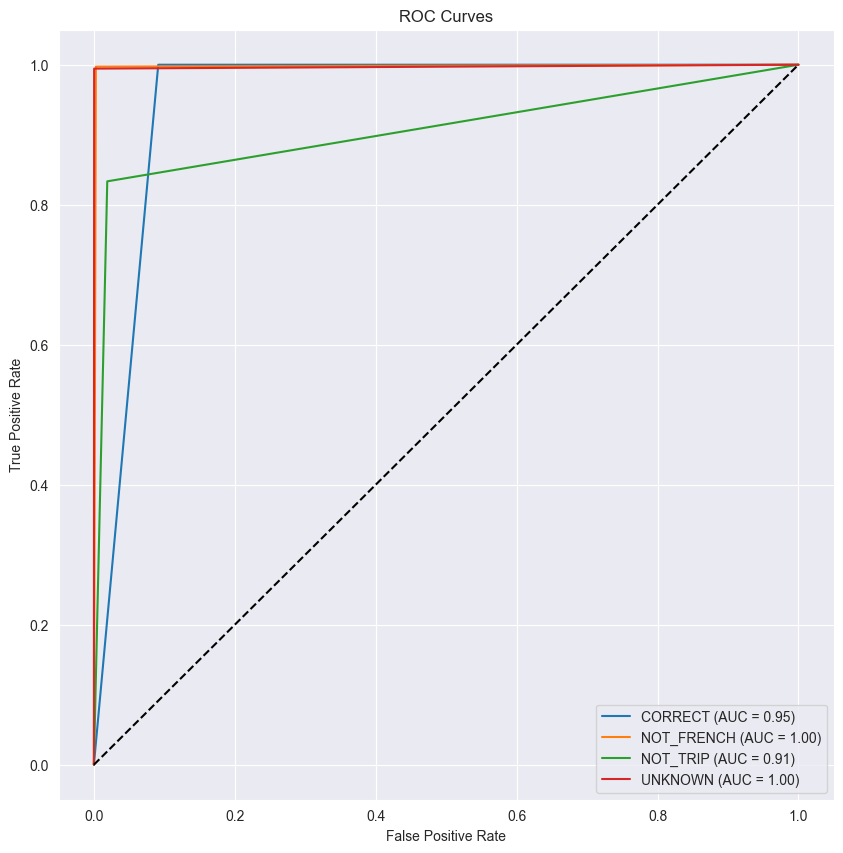

In [42]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [43]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 33.5%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 97.2%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 1.5%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.8%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 7.7%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.3%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 5.6%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 94.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 42.7%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 83.9%
 - NOT_FRENCH => 11.4%
 - NOT_TRIP => 13.4%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Éti

### L'ajout des stopwords ne semble pas améliorer les performances du modèle.